In [2]:
import numpy as np
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

# Directory

In [2]:
directory='./run/campaign09r/'
fit=['Fit_E','Fit_H', 'Fit_CI','Fit_IQ']

# Calculation of R2 for all predictions

In [5]:
for num_pred in range (0,len(fit)):

    run_dir=directory+'/'+fit[num_pred]+'/'
    #print(run_dir)
    subdirs = [f.path for f in os.scandir(run_dir) if f.is_dir() and not f.name.startswith('.')]
    subdirs = sorted(subdirs)
    #print(subdirs)
   
    df_r2_mean_std=pd.DataFrame(columns=['model0'],index=['R2 mean','R2 std'])
    df_r2_models=pd.DataFrame(columns=['model0'])
    i=0
    for s in subdirs:
        r2_table=[]
        about= json.load(open(s+'/about.json'))
        name_model=about['args']['model_id']
        name_database=about['args']['dataset_id']
        iteration=[f.path for f in os.scandir(s) if f.is_dir() and not f.name.startswith('.')]
        for it in iteration:
            k_fold=[f.path for f in os.scandir(it) if f.is_dir() and not f.name.startswith('.')]
            for k in k_fold:
                with open(k+'/yytest.json') as fd:
                    yy = json.load(fd)
                    y_pred=np.reshape(np.array(yy['y_pred']),(np.shape(np.array(yy['y_pred']))[0]))
                    y_test=np.reshape(np.array(yy['y_test']),(np.shape(np.array(yy['y_test']))[0]))
                    corr_matrix = np.corrcoef(y_test,y_pred)
                    corr = corr_matrix[0,1]
                    R2 = corr**2
                    r2_table.append(R2)
        
        df_r2_models[name_model + ' on ' + name_database]=r2_table
        df_r2_mean_std[name_model + ' on ' + name_database]=[np.mean(r2_table),np.std(r2_table)]                                              
        i+=1
    display(fit[num_pred])
    del df_r2_mean_std['model0']
    # display(df_r2_models)
    df_r2_mean_std=df_r2_mean_std.T
    display(df_r2_mean_std)
    #maxR2=df_r2_mean_std['R2 mean'].max()
    #bestmodel=df_r2_mean_std['R2 mean'].idxmax()
    # print('The best model is '+bestmodel +' with R2='+str(maxR2)+' +/- '+str(df_r2_mean_std['R2 std'][bestmodel])+'\n')
    #df_r2_models.to_csv(f'{directory}results/regression/Raw_R2_'+runs[num_model]+'_'+fit[num_pred]+'.csv')
   # df_r2_mean_std.to_csv(f'{directory}results/regression/R2_mean_std_'+'_'+fit[num_pred]+'.csv')                                                    

'Fit_E'

,R2 mean,R2 std
sklearn-RF-100-10 on compo_E_w_outliers,0.809930,0.039454
keras-100x100x100x100 on compo_E_w_outliers,0.822680,0.039644
sklearn-nuSVR-rbf-0.5-1000 on compo_E_w_outliers,0.822876,0.043873
sklearn-RF-100-10 on compo_E_threshold,0.923034,0.027316
keras-100x100x100x100 on compo_E_threshold,0.926141,0.030750
sklearn-nuSVR-rbf-0.5-1000 on compo_E_threshold,0.917478,0.027911
sklearn-RF-100-10 on compo_E_wo_outliers,0.970448,0.011983
keras-100x100x100x100 on compo_E_wo_outliers,0.967287,0.010540
sklearn-nuSVR-rbf-0.5-1000 on compo_E_wo_outliers,0.956849,0.009574
sklearn-RF-100-10 on compo_E_wo_outliers_averaged,0.938316,0.019657


'Fit_H'

,R2 mean,R2 std
sklearn-rfr-150-10 on compo_H_w_outliers,0.751919,0.051537
keras-100x100x100x100 on compo_H_w_outliers,0.750104,0.050846
sklearn-nuSVR-rbf-0.5-1000 on compo_H_w_outliers,0.743927,0.058346
sklearn-rfr-150-10 on compo_H_threshold,0.889267,0.035243
keras-100x100x100x100 on compo_H_threshold,0.889545,0.039279
sklearn-nuSVR-rbf-0.5-1000 on compo_H_threshold,0.878874,0.036782
sklearn-rfr-150-10 on compo_H_wo_outliers,0.963433,0.008873
keras-100x100x100x100 on compo_H_wo_outliers,0.963670,0.007911
sklearn-nuSVR-rbf-0.5-1000 on compo_H_wo_outliers,0.945942,0.012440
sklearn-rfr-150-10 on compo_H_wo_outliers_averaged,0.922252,0.020942


'Fit_CI'

,R2 mean,R2 std
sklearn-rfr-150-5 on compo_CI,0.899715,0.055896
keras-50x100x100x50 on compo_CI,0.945874,0.039453
sklearn-nuSVR-rbf-0.8-100 on compo_CI,0.937025,0.039211


'Fit_IQ'

,R2 mean,R2 std
sklearn-rfr-50-5 on compo_IQ,0.902735,0.055677
keras-100x100x100x100 on compo_IQ,0.747850,0.061700
sklearn-nuSVR-poly3-0.2-1000 on compo_IQ,0.646202,0.099651


In [3]:
directory=['./run/campaign09cNN', './run/campaign09c']
classification=['Class_EBSD','Class_XRD']
predict_type_list=['sigmoid', 'classes']

./run/campaign09cNN/Class_EBSD/


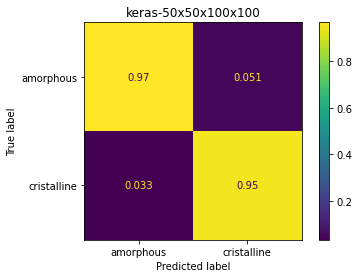

'Class_EBSD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
keras-50x50x100x100 on compo_CI_class,0.957545,0.023285,0.946246,0.027602,0.967038,0.029206,0.956285,0.024086,0.967928,0.028301,0.948865,0.026358,0.958093,0.023501,0.957529,0.023279,0.042455,0.023285


./run/campaign09cNN/Class_XRD/


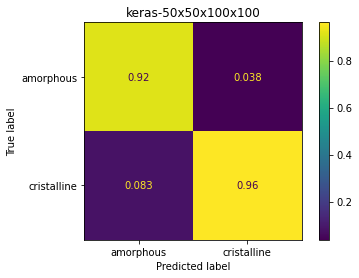

'Class_XRD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
keras-50x50x100x100 on compo_DRX_class,0.947181,0.026381,0.925105,0.052937,0.916628,0.046857,0.919839,0.041013,0.958273,0.023513,0.96231,0.028074,0.960014,0.020546,0.947206,0.026599,0.052819,0.026381


./run/campaign09c/Class_EBSD/


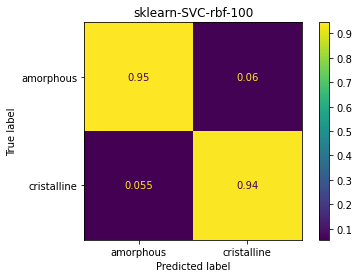

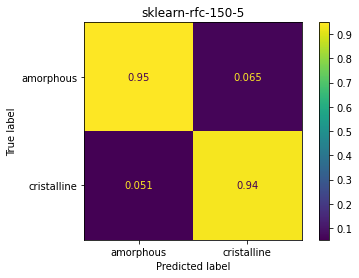

'Class_EBSD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
sklearn-SVC-rbf-100 on compo_CI_class,0.942320,0.020571,0.936770,0.03538,0.945793,0.033886,0.940491,0.022269,0.947794,0.032843,0.940143,0.032154,0.943259,0.020408,0.942295,0.020589,0.057680,0.020571
sklearn-rfc-150-5 on compo_CI_class,0.941661,0.022928,0.932495,0.03736,0.949440,0.035478,0.940034,0.023326,0.951155,0.035140,0.935458,0.037149,0.942424,0.023839,0.941647,0.022913,0.058339,0.022928


./run/campaign09c/Class_XRD/


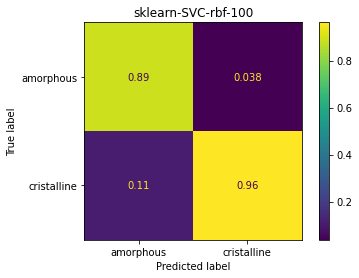

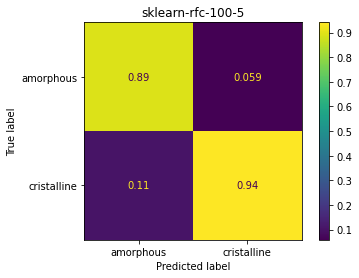

'Class_XRD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
sklearn-SVC-rbf-100 on compo_DRX_class,0.938565,0.023129,0.926613,0.044749,0.893099,0.048219,0.908416,0.034619,0.945075,0.024343,0.962086,0.025083,0.953218,0.018520,0.938874,0.023005,0.061435,0.023129
sklearn-rfc-100-5 on compo_DRX_class,0.926046,0.028271,0.882871,0.065837,0.894889,0.052168,0.886863,0.043324,0.948277,0.026303,0.941619,0.034566,0.944444,0.022195,0.925829,0.028655,0.073954,0.028271


In [5]:
n=0
for dir in directory:
    for num_pred in range (0,len(classification)):
        
        run_dir=dir+'/'+classification[num_pred]+'/'
        print(run_dir)
        subdirs = [f.path for f in os.scandir(run_dir) if f.is_dir() and not f.name.startswith('.')]
        subdirs = sorted(subdirs)
        #print(subdirs)

        df_metrics_mean_std=pd.DataFrame(columns=['model0'],
                                            index=['accuracy mean','accuracy std',
                                                'recall amorphous mean', 'recall amorphous std', 
                                                'precision amorphous mean','precision amorphous std',
                                                'F1 amorphous mean','F1 amorphous std',
                                                'recall cristalline mean', 'recall cristalline std', 
                                                'precision cristalline mean','precision cristalline std',
                                                'F1 cristalline mean','F1 cristalline std',
                                                'F1 weighted mean' , 'F1 weighted std',
                                                'Hamming loss mean', 'Hamming loss std'])
        
        df_metrics_models=pd.DataFrame(columns=['model0'])
        i=0
        for s in subdirs:
            accuracy_table=[]
            recall_table_amorphe=[]
            precision_table_amorphe=[]
            F1_table_amorphe=[]
            recall_table_crist=[]
            precision_table_crist=[]
            F1_table_crist=[]
            F1_table_weighted=[]
            Hml_table=[]
            y_pred_list=[]
            y_test_list=[]
            
            
            about= json.load(open(s+'/about.json'))
            name_model=about['args']['model_id']
            name_database=about['args']['dataset_id']
            iteration=[f.path for f in os.scandir(s) if f.is_dir() and not f.name.startswith('.')]
            for it in iteration:
                k_fold=[f.path for f in os.scandir(it) if f.is_dir() and not f.name.startswith('.')]
                for k in k_fold:
                    with open(k+'/yytest.json') as fd:
                        yy = json.load(fd)
                        y_pred=np.array(yy['y_pred'])
                        y_test=np.array(yy['y_test'])
                        predict_type=predict_type_list[n]
                        if predict_type=='softmax':
                            #print('y_pred is considered as softmax array')
                            y_pred = np.array( [ np.argmax(y) for y in y_pred] )

                        if predict_type=='sigmoid':
                            #print('y_pred is considered as sigmoid array')
                            y_pred = np.array( [ 0 if y<0.5 else 1 for y in y_pred] )

                        if predict_type=='classes':
                            #print('y_pred is considered as classes array')
                            y_pred = y_pred.squeeze()
                        metrics =pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
                        #display(metrics)
                        #print(metrics['recall'].keys)
                        amorph_key=metrics['recall'].keys()[0]
                        crist_key=metrics['recall'].keys()[1]
                        
                        accuracy_table.append(metrics['precision']['accuracy'])
                        recall_table_amorphe.append(metrics['recall'][amorph_key])
                        precision_table_amorphe.append(metrics['precision'][amorph_key])
                        F1_table_amorphe.append(metrics['f1-score'][amorph_key])
                        recall_table_crist.append(metrics['recall'][crist_key])
                        precision_table_crist.append(metrics['precision'][crist_key])
                        F1_table_crist.append(metrics['f1-score'][crist_key])
                        F1_table_weighted.append(metrics['f1-score']['weighted avg'])
                        Hml_table.append(hamming_loss(y_test, y_pred))
                        y_pred_list.extend(y_pred)
                        y_test_list.extend(y_test)
                        
            #y_pred_list=np.concatenate(y_pred_list[:])  
            #y_test_list=np.concatenate(y_test_list[:])             
            
            df_metrics_mean_std[name_model + ' on ' + name_database]=[np.mean(accuracy_table),np.std(accuracy_table),
                                                                    np.mean(recall_table_amorphe),np.std(recall_table_amorphe),
                                                                    np.mean(precision_table_amorphe),np.std(precision_table_amorphe),
                                                                    np.mean(F1_table_amorphe),np.std(F1_table_amorphe),
                                                                    np.mean(recall_table_crist),np.std(recall_table_crist),
                                                                    np.mean(precision_table_crist),np.std(precision_table_crist),
                                                                    np.mean(F1_table_crist),np.std(F1_table_crist),
                                                                    np.mean(F1_table_weighted),np.std(F1_table_weighted),
                                                                    np.mean(Hml_table),np.std(Hml_table)]                                            
                                                
            cm = confusion_matrix( y_test_list, y_pred_list, normalize="pred")
            
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['amorphous','cristalline'])
            disp.plot()
            plt.title(name_model)
            plt.show()    
        display(classification[num_pred])
        del df_metrics_mean_std['model0']
        # display(df_r2_models)
        df_metrics_mean_std=df_metrics_mean_std.T
        display(df_metrics_mean_std)
        max_F1_w=df_metrics_mean_std['F1 weighted mean'].max()
        # max_F1_w=df_metrics_mean_std['F1 weighted mean'].max()
        #bestmodel=df_metrics_mean_std['F1 weighted mean'].idxmax()
        #accuracy_best=(df_metrics_mean_std['accuracy mean'].idxmax()==bestmodel)
        #hml_best=(df_metrics_mean_std['Hamming loss mean'].idxmin()==bestmodel)
        #print('The best model for phase classification is '+bestmodel +' with F1w='+str(max_F1_w)+' +/- '+str(df_metrics_mean_std['F1 weighted std'][bestmodel])+'\n')
        #print('The best accuracy is obtained for the same model :'+str(accuracy_best)+'\n')
        #print('The lowest Hamming loss is obtained for the same model :'+str(hml_best)+'\n')

        #df_metrics_mean_std.to_csv(f'{directory}results/Raw_R2_'+runs[num_model]+'_'+fit[num_pred]+'.csv')
        #  df_metrics_mean_std.to_csv(f'{directory}results/class/metrics_mean_std_'+runs[num_model]+'_'+classification[num_pred]+'.csv')                                                    

In [15]:
y_pred=yy['y_pred'].extend()

TypeError: extend() takes exactly one argument (0 given)